# Combining

This example demonstrates how to create
a neuronal ensemble that will combine two 1-D inputs
into one 2-D representation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo

## Step 1: Create the neural populations

Our model consists of three ensembles,
two input ensembles and one 2-D ensemble
that will represent the two inputs as one two-dimensional signal.

In [2]:
model = nengo.Network(label="Combining")
with model:
    # Our input ensembles consist of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal
    A = nengo.Ensemble(100, dimensions=1)
    B = nengo.Ensemble(100, dimensions=1)

    # The output ensemble consists of 200 leaky integrate-and-fire neurons,
    # representing a two-dimensional signal
    output = nengo.Ensemble(200, dimensions=2, label="2D Population")

## Step 2: Create input for the model

We will use sine and cosine waves
as examples of continuously changing signals.

In [3]:
with model:
    # Create input nodes generating the sine and cosine
    sin = nengo.Node(output=np.sin)
    cos = nengo.Node(output=np.cos)

## Step 3: Connect the network elements

In [4]:
with model:
    nengo.Connection(sin, A)
    nengo.Connection(cos, B)

    # The square brackets define which dimension the input will project to
    nengo.Connection(A, output[1])
    nengo.Connection(B, output[0])

## Step 4: Probe outputs

Anything that is probed will collect the data it produces over time,
allowing us to analyze and visualize it later.

In [5]:
with model:
    sin_probe = nengo.Probe(sin)
    cos_probe = nengo.Probe(cos)
    A_probe = nengo.Probe(A, synapse=0.01)  # 10ms filter
    B_probe = nengo.Probe(B, synapse=0.01)  # 10ms filter
    out_probe = nengo.Probe(output, synapse=0.01)  # 10ms filter

## Step 5: Run the model

In [6]:
# Create our simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

## Step 6: Plot the results

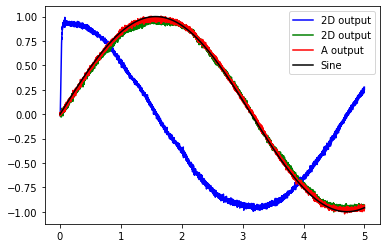

In [7]:
# Plot the decoded output of the ensemble
plt.figure()
plt.plot(sim.trange(), sim.data[out_probe][:, 0], "b", label="2D output")
plt.plot(sim.trange(), sim.data[out_probe][:, 1], "g", label="2D output")
plt.plot(sim.trange(), sim.data[A_probe], "r", label="A output")
plt.plot(sim.trange(), sim.data[sin_probe], "k", label="Sine")
plt.legend()

The graph shows that the input signal (Sine),
the output from the 1D population (A output),
and the 2D population (green line) are all equal.
The other dimension in the 2D population is shown in blue.